In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers

In [ ]:
train_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')


In [ ]:
data= [train_set, test_set]

for dataset in data:
    dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())
    dataset['Age']=dataset['Age'].astype(int)

In [ ]:
gender ={'male':0, 'female':1}
data= [train_set,test_set]

for dataset in data:
      dataset['Sex']=dataset['Sex'].map(gender)

In [ ]:
port ={'S':0,'C':1,'Q':2}
data =[train_set, test_set]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')
    
for dataset in data:
    dataset['Embarked']= dataset['Embarked'].map(port)
    dataset['Embarked']=dataset['Embarked'].astype(int)

In [ ]:
test_set_id= test_set['PassengerId']
test_set_name=test_set['Name']

train_set=train_set.drop(['PassengerId'],axis=1)
train_set= train_set.drop(['Cabin'],axis=1)
train_set= train_set.drop(['Name'],axis=1)
train_set=train_set.drop(['Ticket'],axis=1)
    
test_set=test_set.drop(['PassengerId'],axis=1)
test_set= test_set.drop(['Cabin'],axis=1)
test_set= test_set.drop(['Name'],axis=1)
test_set=test_set.drop(['Ticket'],axis=1)


In [ ]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0


In [ ]:
train_set_mean= train_set.mean()
train_set_std=train_set.std()

train_set_norm=(train_set - train_set_mean)/train_set_std

test_set_mean=test_set.mean()
test_set_std= test_set.std()

test_set_norm=(test_set - test_set_mean)/test_set_std

In [ ]:
feature_coloumns=[]
Age=tf.feature_column.numeric_column('Age')
Pclass=tf.feature_column.numeric_column('Pclass')
Embarked=tf.feature_column.numeric_column('Embarked')
SibSp =tf.feature_column.numeric_column('SibSp')
Parch=tf.feature_column.numeric_column('Parch')
Sex=tf.feature_column.numeric_column('Sex')
Fare=tf.feature_column.numeric_column('Fare')

feature_coloumns.append(Age)
feature_coloumns.append(Pclass)
feature_coloumns.append(Embarked)
feature_coloumns.append(SibSp)
feature_coloumns.append(Parch)
feature_coloumns.append(Sex)
feature_coloumns.append(Fare)

feature_layer=layers.DenseFeatures(feature_coloumns)
feature_layer(dict(train_set_norm))


In [ ]:
def create_model(my_learning_rate, feature_layer,my_metrics):
      model =tf.keras.models.Sequential()
      model.add(feature_layer)
      model.add(tf.keras.layers.Dense(units=1,input_shape=(7,7), activation=tf.sigmoid),)
      model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)
      return model


In [ ]:
def train_model(model,dataset,epochs,label_name,batch_size=None,shuffle=False):
      features= {name:np.array(value) for name ,value in dataset.items()}
      label = np.array(features.pop(label_name)) 
      history= model.fit(x=features,y=label,batch_size=batch_size,shuffle=shuffle)
      epoch=history.epoch

      hist= pd.DataFrame(history.history)
      return epoch,hist

In [ ]:
def plot_function(epoch, hist, matrices):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in matrices:
          x=hist[m]
          plt.plot(epoch[1:],x[1:],label=m)

    
    plt.legend()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 2ms/step - loss: 0.8121 - accuracy: 0.0000e+00


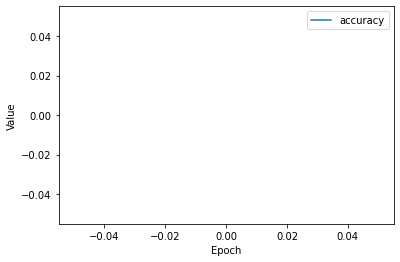

In [ ]:
learning_rate=0.01
epochs=30
batch_size=100
label="Survived"
treshold=0.5

Metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy',threshold=treshold)]

my_model= create_model(learning_rate,feature_layer,Metrics)

epochs, hist= train_model(my_model,train_set_norm,epochs,label,batch_size)

list_of_metrices=['accuracy']

plot_function(epochs,hist, list_of_metrices)